In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("./input/titanic_train.csv")
test = pd.read_csv("./input/titanic_test.csv")

In [3]:
print(len(train),"\n",len(test))

891 
 418


In [4]:
#  We may create an entire model to predict age based off of other features.
def impute_age(cols):
    Age = cols[0] # First item in cols
    Pclass = cols[1] # Second item
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: # Not in first or second class means it is third class
            return 24
    else: #If age is null then we return some int based upon average age of that Pclass but if it is not then we do following :
        return int(Age)

In [5]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1) # axis = 1 as we want to apply it across columns
test['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [6]:
train.drop("Cabin",axis=1, inplace=True)
test.drop("Cabin",axis=1, inplace=True)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [8]:
print(len(train),"\n",len(test))

891 
 418


In [9]:
train_dummy = pd.get_dummies(train['Sex'])
test_dummy = pd.get_dummies(test['Sex'])

In [10]:
train_sex = pd.get_dummies(train['Sex'],drop_first=True)
test_sex = pd.get_dummies(test['Sex'],drop_first=True)

In [11]:
train_embark = pd.get_dummies(train['Embarked'],drop_first=True)
test_embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [13]:
import seaborn as sns

In [14]:
print(len(train),"\n",len(test))

891 
 418


In [15]:
train = train.fillna(0)
test = test.fillna(0)

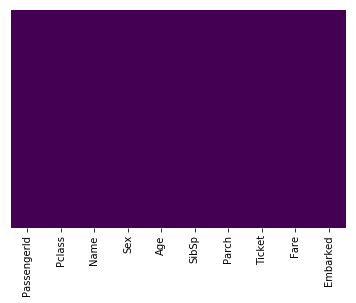

In [16]:
sns.heatmap(test.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
train = pd.concat([train,train_sex,train_embark],axis=1)
test = pd.concat([test,test_sex,test_embark],axis=1)

In [18]:
train['Fare'] = train['Fare'].round(2)
test['Fare'] = test['Fare'].round(2)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.28,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,S,1,0,1


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,22,0,0,330911,7.83,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38,1,0,363272,7.00,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,26,0,0,240276,9.69,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,35,0,0,315154,8.66,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35,1,1,3101298,12.29,S,0,0,1


In [21]:
print(len(train),"\n",len(test))

891 
 418


In [22]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22,1,0,7.25,1,0,1
1,2,1,1,38,1,0,71.28,0,0,0
2,3,1,3,26,0,0,7.92,0,0,1
3,4,1,1,35,1,0,53.10,0,0,1
4,5,0,3,35,0,0,8.05,1,0,1


In [24]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,22,0,0,7.83,1,1,0
1,893,3,38,1,0,7.00,0,0,1
2,894,2,26,0,0,9.69,1,1,0
3,895,3,35,0,0,8.66,1,0,1
4,896,3,35,1,1,12.29,0,0,1


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = train.drop("Survived",axis=1)
for i in range(len(X)):
    X['PassengerId'] = int(X['PassengerId'][i])
    X["Pclass"] = int(X["Pclass"][i])
    X['Age'] = int(X['Age'][i])
    X['SibSp'] = int(X['SibSp'][i])
    X['Parch'] = int(X['Parch'][i])
    X['Fare'] = int(X['Parch'][i])
print(X.head())

y = train['Survived']
y.dropna()
for i in range(len(y)):
    y[i] = int(y[i])
print(y.head())
X_train,X_test,y_train,y_test= train_test_split(X, y,test_size=0.25, random_state=66)

   PassengerId  Pclass  Age  SibSp  Parch  Fare  male  Q  S
0            1       3   22      1      0     0     1  0  1
1            1       3   22      1      0     0     0  0  0
2            1       3   22      1      0     0     0  0  1
3            1       3   22      1      0     0     0  0  1
4            1       3   22      1      0     0     1  0  1


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [27]:
# for i in range(len(X)):
#     X['PassengerId'] = int(X['PassengerId'][i])
#     X["Pclass"] = int(X["Pclass"][i])
#     X['Age'] = int(X['Age'][i])
#     X['SibSp'] = int(X['SibSp'][i])
#     X['Parch'] = int(X['Parch'][i])
#     X['Fare'] = int(X['Parch'][i])

In [28]:
print(len(train),"\n",len(test))

891 
 418


In [29]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22,1,0,0,1,0,1
1,1,3,22,1,0,0,0,0,0
2,1,3,22,1,0,0,0,0,1
3,1,3,22,1,0,0,0,0,1
4,1,3,22,1,0,0,1,0,1


In [47]:
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [64]:
# logmodel = LogisticRegression()
#kn = KNeighborsClassifier(n_neighbors=10)
kn = KNeighborsClassifier(n_neighbors=20)

In [65]:
#train

In [66]:
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [67]:
test2 = pd.read_csv("./input/titanic_test.csv")

In [68]:
len(test2)

418

In [69]:
predictions = kn.predict(test)

In [70]:
submission = pd.DataFrame({'PassengerId':test2['PassengerId'],'Survived':predictions})

In [71]:
submission.to_csv("submission.csv",index=False)

In [40]:
from sklearn.metrics import confusion_matrix